# **Финансы**

## Импорт 

In [1]:
import sqlite3
import time 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from SQL_query import SQLQueries
from Constants import DateUtils, Colors
from CreateDB import create_db
import seaborn as sns

%matplotlib inline


## Обновление БД

In [2]:
path_defoult = "/Users/artemsaman/Desktop/Jupyter_note/2025.xlsx"
create_db(path_defoult)

1) Таблица Expenses создана и данные записаны.
2) Переписываем данные
3) Удаляем таблицу
4) Переименовываем таблицу в Expenses 

1) Таблица Income создана и данные записаны.
2) Переписываем данные
3) Удаляем таблицу
4) Переименовываем таблицу в Income 


## Визуализация данных

### Сравнение Доходов и Расходов

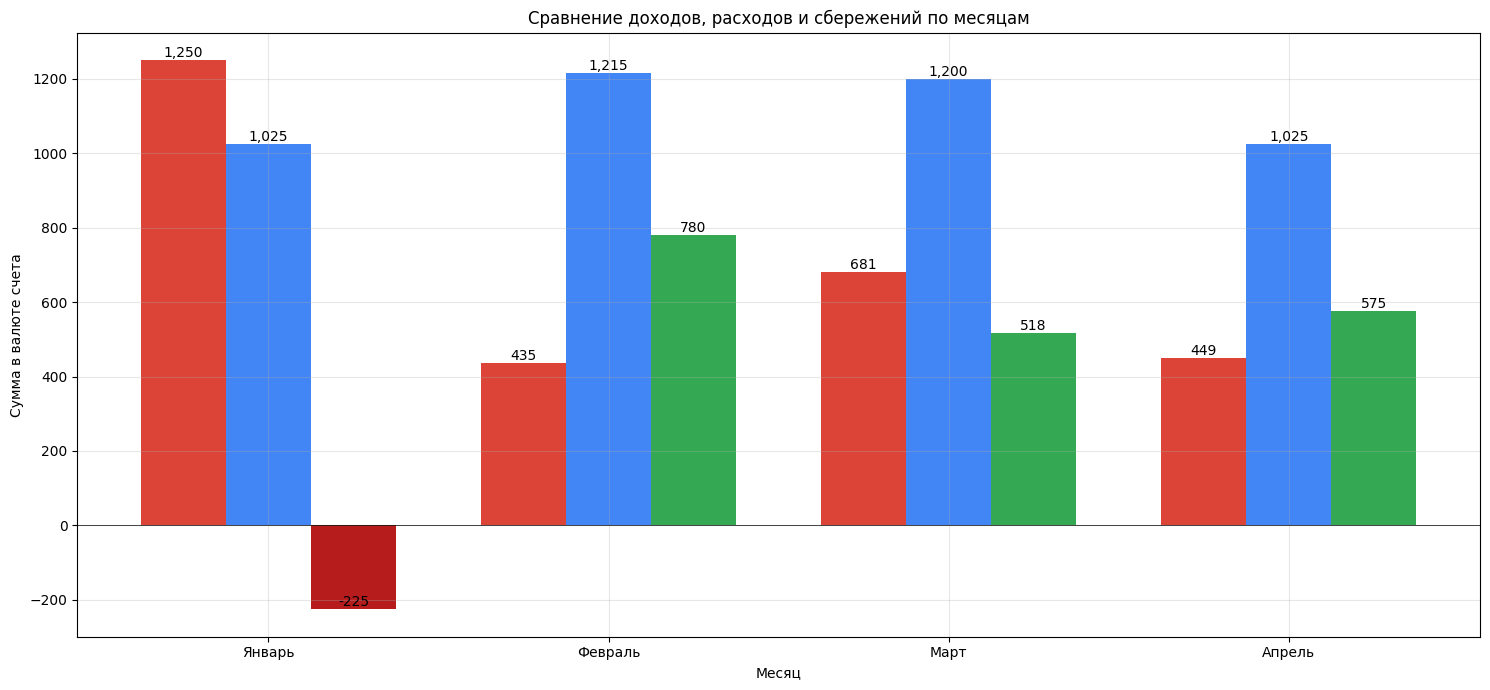

In [3]:
# Гистрограмма
conn = sqlite3.connect("wallet.db")
df = pd.read_sql_query(SQLQueries.get_monthly_comparison(), conn)
conn.close()

# Преобразуем номера месяцев в названия
df['Месяц'] = df['Месяц'].map(DateUtils.get_month_name)
    
# Создаем график
plt.figure(figsize=(15, 7))
    
# Устанавливаем ширину столбцов
bar_width = 0.25
    
# Создаем позиции для столбцов
x = np.arange(len(df['Месяц']))
    
# Создаем столбцы для расходов, доходов и сбережений
bars1 = plt.bar(x - bar_width, df['Расходы'], bar_width, 
                    label='Расходы', color=Colors.GOOGLE_COLORS["Red"])
bars2 = plt.bar(x, df['Доходы'], bar_width, 
                    label='Доходы', color=Colors.GOOGLE_COLORS["Blue"])
    
# Создаем столбцы сбережений с разными цветами
savings_colors = ['#34A853' if val >= 0 else '#B71C1C' for val in df['Сбережения']]
bars3 = plt.bar(x + bar_width, df['Сбережения'], bar_width, 
                    label='Сбережения', color=savings_colors)
    
# Добавляем значения над столбцами
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
plt.axhline(y = 0, color = 'black', linewidth = 0.5)
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)   
    
    # Настраиваем внешний вид графика
plt.title('Сравнение доходов, расходов и сбережений по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма в валюте счета')
plt.xticks(x, df['Месяц'])
plt.grid(True, linestyle='-', alpha=0.3)
plt.tight_layout()
plt.savefig("Месячные_себережения.png")
plt.show()

## Дэшборд 

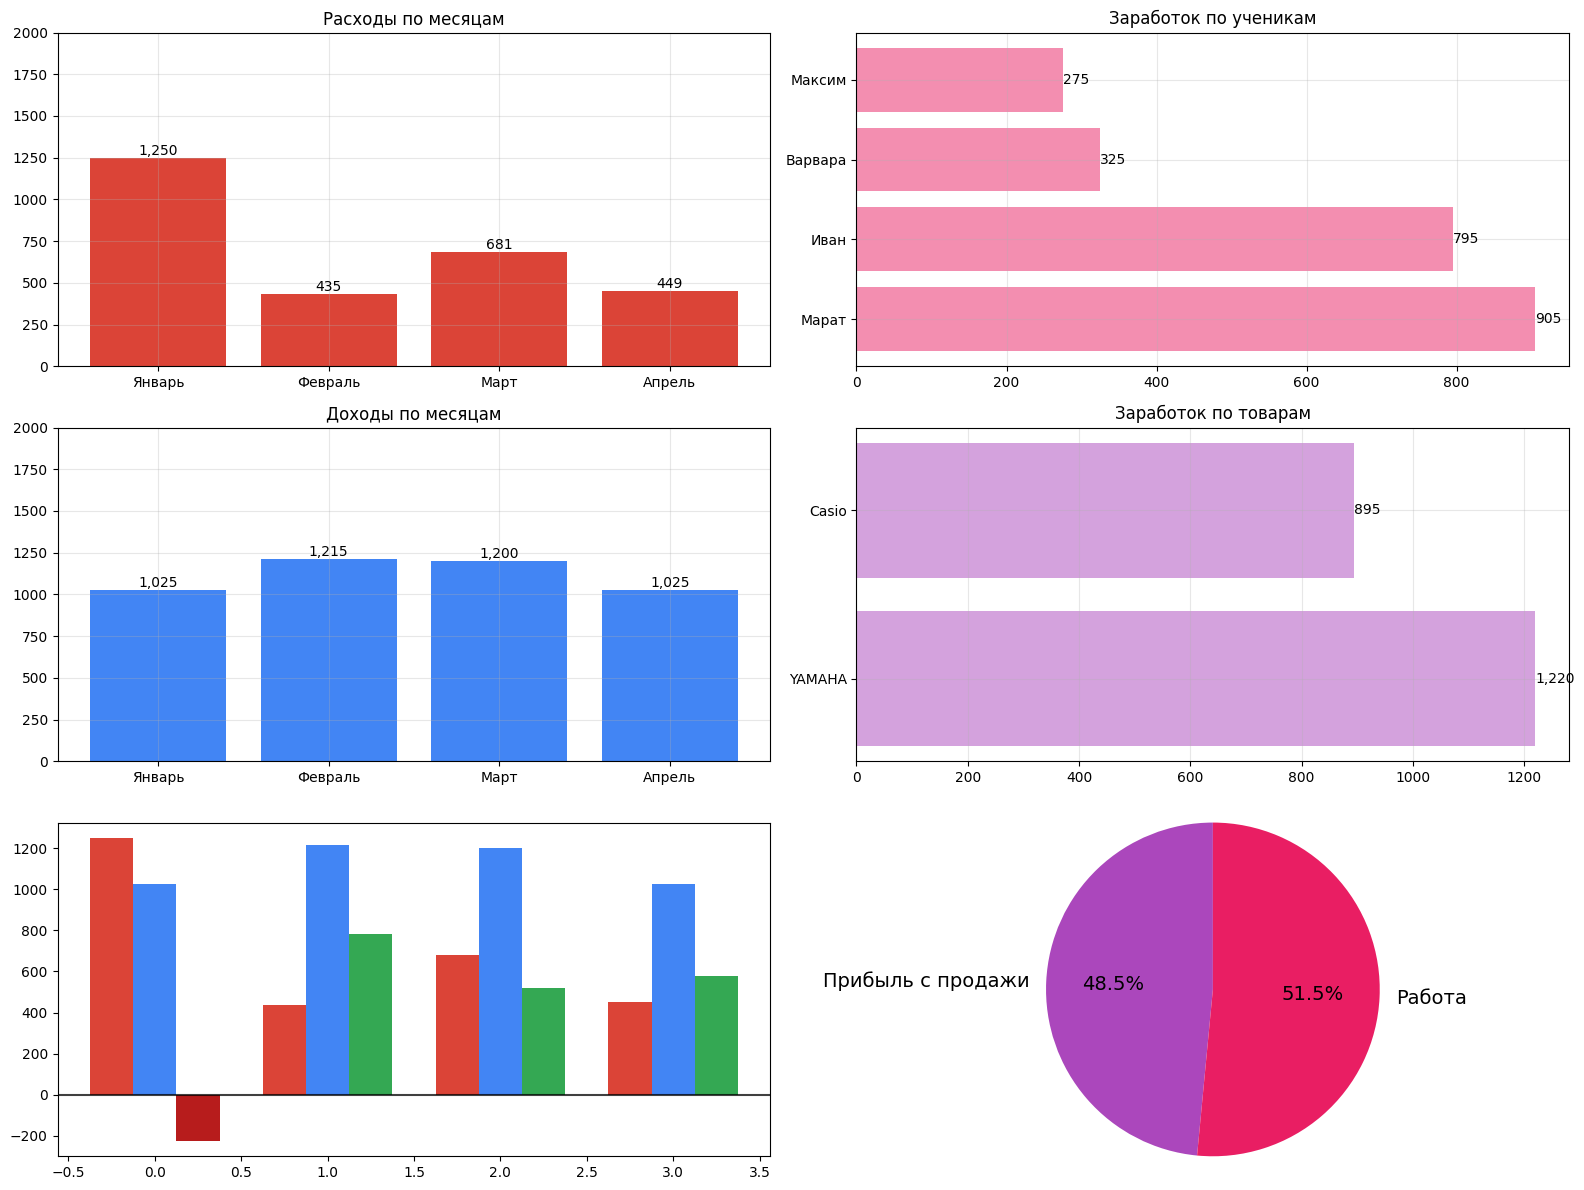

In [4]:
    # Создаем фигуру с подграфиками
fig = plt.figure(figsize=(16, 12))

# 1. График расходов по месяцам
plt.subplot(3, 2, 1)
conn = sqlite3.connect("wallet.db")
df_expenses = pd.read_sql_query(SQLQueries.get_total_expenses_by_month(), conn)
df_expenses['Месяц'] = df_expenses['Месяц'].map(DateUtils.get_month_name)
bars = plt.bar(df_expenses['Месяц'], df_expenses['Сумма в валюте счета'], 
                color=Colors.GOOGLE_COLORS["Red"])
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
plt.ylim(0, 2000)
plt.title('Расходы по месяцам')
plt.grid(True, linestyle='-', alpha=0.3)

# 2. График заработка по ученикам
plt.subplot(3, 2, 2)
df_students = pd.read_sql_query(SQLQueries.get_income_by_student(), conn)
bars = plt.barh(df_students['Ученик'], df_students['Сумма'], 
                color=Colors.GOOGLE_COLORS["Pink"], alpha = 0.5)
for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f'{int(width):,}',
                ha='left', va='center')
plt.title('Заработок по ученикам')
plt.grid(True, linestyle='-', alpha=0.3)

# 3. График доходов по месяцам
plt.subplot(3, 2, 3)
df_income = pd.read_sql_query(SQLQueries.get_monthly_income(), conn)
df_income['Месяц'] = df_income['Месяц'].map(DateUtils.get_month_name)
bars = plt.bar(df_income['Месяц'], df_income['Сумма в валюте счета'], 
                color=Colors.GOOGLE_COLORS["Blue"])
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
plt.ylim(0, 2000)
plt.title('Доходы по месяцам')
plt.grid(True, linestyle='-', alpha=0.3)

plt.subplot(3, 2, 5)  
df_comrassion = pd.read_sql_query(SQLQueries.get_monthly_comparison(), conn)
df_comrassion['Месяц'] = df_comrassion['Месяц'].map(DateUtils.get_month_name)
# Создаем позиции для столбцов
x = np.arange(len(df_comrassion['Месяц']))
bar_width = 0.25
# Создаем столбцы для расходов, доходов и сбережений
bars1 = plt.bar(x - bar_width, df_comrassion['Расходы'], bar_width, 
                label='Расходы', color=Colors.GOOGLE_COLORS["Red"])
bars2 = plt.bar(x, df_comrassion['Доходы'], bar_width, 
                label='Доходы', color=Colors.GOOGLE_COLORS["Blue"])

# Создаем столбцы сбережений с разными цветами
savings_colors = ['#34A853' if val >= 0 else '#B71C1C' for val in df_comrassion['Сбережения']]
bars3 = plt.bar(x + bar_width, df_comrassion['Сбережения'], bar_width, 
                label='Сбережения', color=savings_colors)
plt.axhline(y = 0, color = "black", alpha = 0.75)


# 6. Круговая диаграмма доходов по категориям
plt.subplot(3, 2, 6)

df_categories = pd.read_sql_query(SQLQueries.get_total_income(), conn)
plt.pie(df_categories['Сумма в валюте счета'], 
        labels=df_categories['Категория'],
        autopct='%1.1f%%',
        radius=1.25,
        startangle=90,
        colors= [ '#AB47BC', '#E91E63'],
        textprops={'fontsize': 14}
)

# 2. График заработка по ученикам
plt.subplot(3, 2, 4)
df_students = pd.read_sql_query(SQLQueries.get_income_by_goods(), conn)
bars = plt.barh(df_students['Товар'], 
                df_students['Сумма'], 
                color=Colors.GOOGLE_COLORS["Purple"],
                alpha = 0.5)
for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f'{int(width):,}',
                ha='left', va='center')
plt.title('Заработок по товарам')
plt.grid(True, linestyle='-', alpha=0.3)

# Добавляем прямоугольную рамку
# plt.title('Распределение доходов по источникам')

conn.close()

# Настраиваем общий макет с увеличенными отступами
plt.subplots_adjust(
top=0.9,      # Отступ сверху
bottom=0.1,   # Отступ снизу
left=0.1,      # Отступ слева
right=0.95,    # Отступ справа
hspace=0.35,    # Отступ между графиками по вертикали
wspace=0.25     # Отступ между графиками по горизонтали
)

plt.tight_layout()
plt.savefig("Дашборд.png")
plt.show()

## Распределение расходов по категориям 

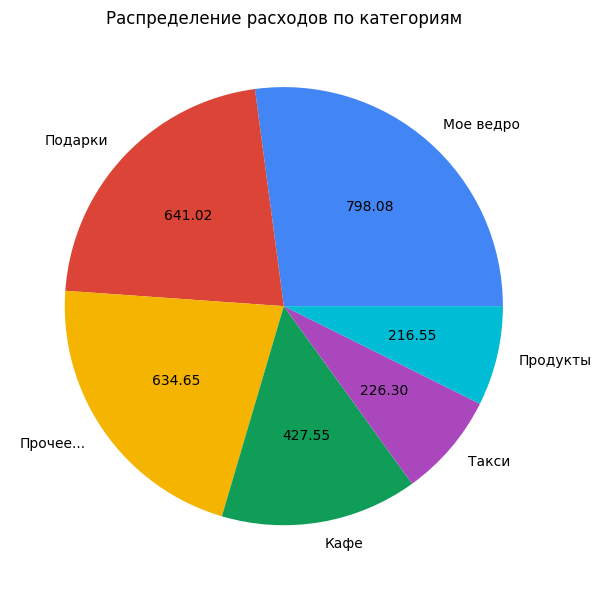

In [5]:
# Круговая диаграмма 
conn = sqlite3.connect("wallet.db")
df = pd.read_sql_query(SQLQueries.get_top_expenses_categories(), conn)

plt.figure(figsize=(8, 6))
plt.pie(
    df["Общая сумма"],
    labels=df["Категория"],
    autopct=lambda p: f'{p * sum(df["Общая сумма"]) / 100:.2f}',
    colors=list(Colors.GOOGLE_COLORS.values())  # ✅ список цветов
)
plt.title("Распределение расходов по категориям")
plt.tight_layout()
plt.savefig("Распределение_доходов_по_категориям.png")
plt.show()


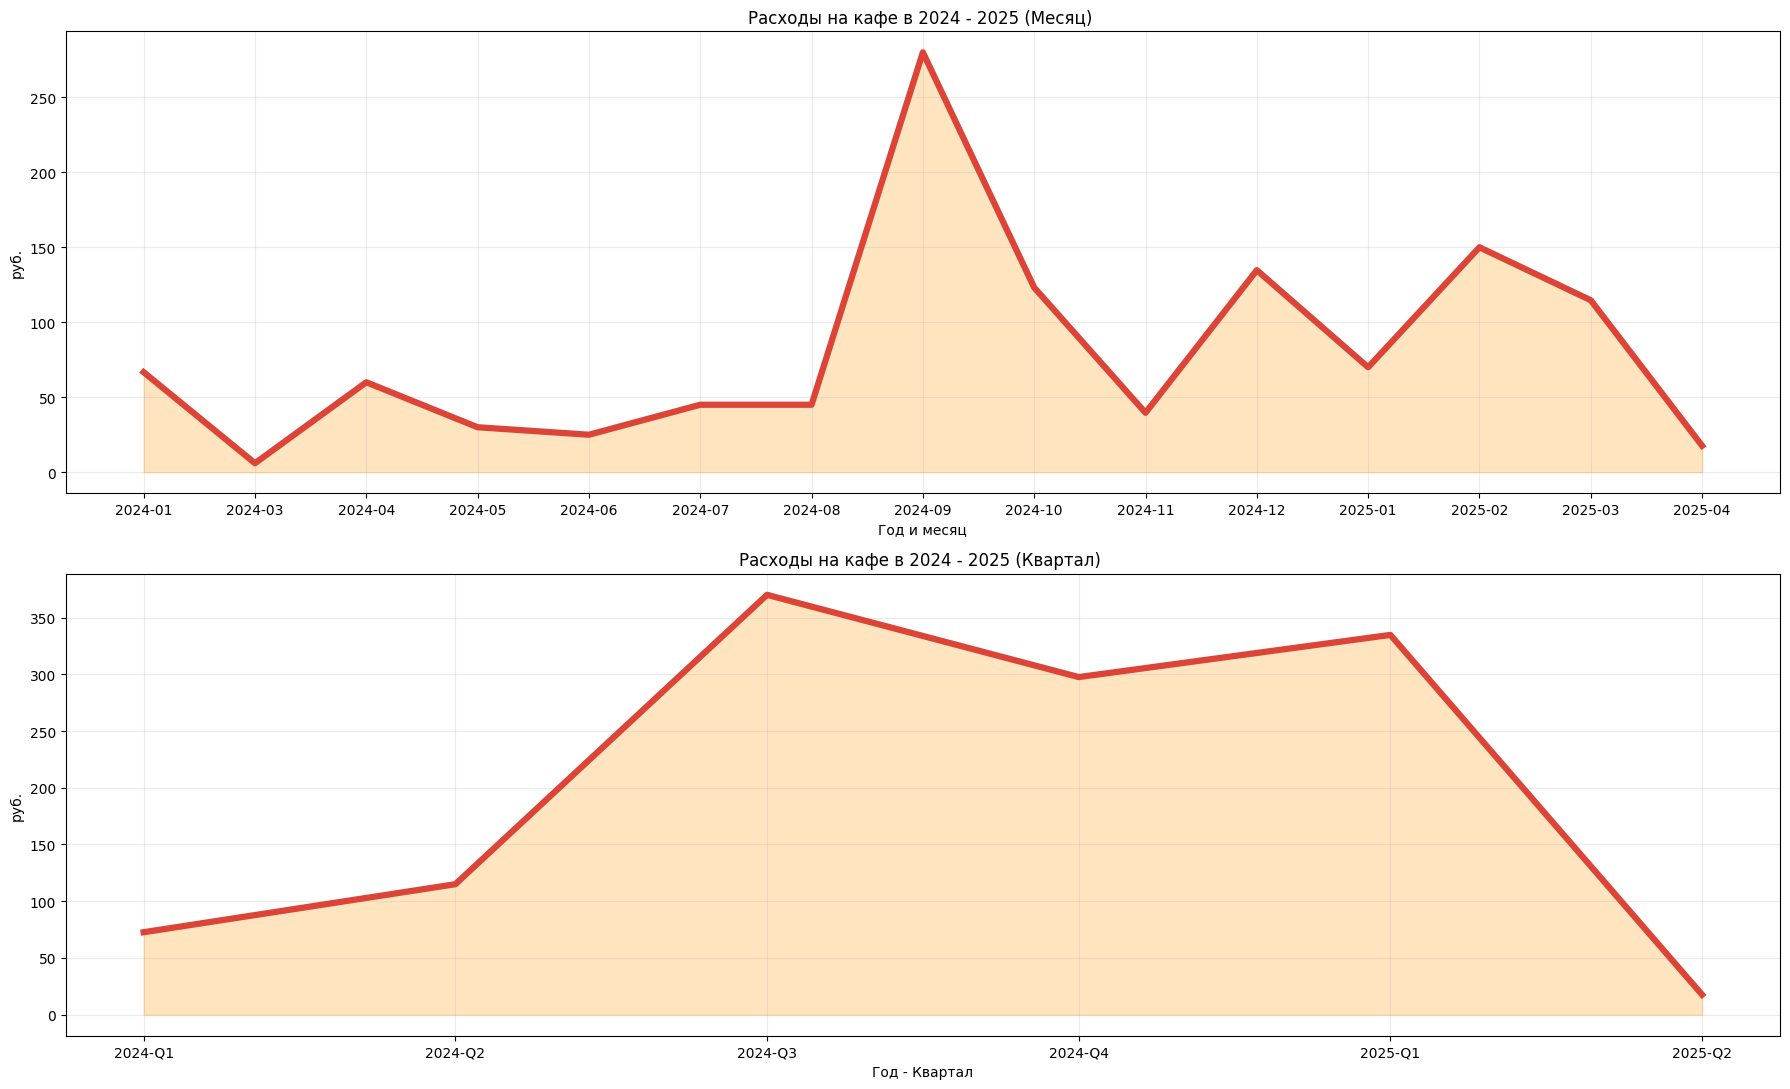

In [6]:
conn = sqlite3.connect("wallet_2024_2025.db")
df = pd.read_sql_query(
        """SELECT 
    strftime("%Y-%m", `Дата и время`) AS date_y,
    ROUND(SUM(`Сумма в валюте счета`), 2) AS Total_expenses
FROM Expenses
WHERE `Категория` = "Кафе"
GROUP BY date_y
ORDER BY date_y;""",
    conn
)
df_Q = pd.read_sql_query(
      """SELECT 
    strftime('%Y', `Дата и время`) || '-Q' || 
    ((CAST(strftime('%m', `Дата и время`) AS INTEGER) + 2) / 3) AS quarter,
    ROUND(SUM(`Сумма в валюте счета`), 2) AS Total_expenses
FROM Expenses
WHERE `Категория` = "Кафе"
GROUP BY quarter
ORDER BY quarter;
""",
    conn
)
plt.figure(figsize=(18, 11))
plt.subplot(2, 1, 1)
plt.plot(df.date_y, df.Total_expenses,linewidth = 4.5, color = Colors.GOOGLE_COLORS["Red"])
plt.fill_between(df.date_y, 0 , df.Total_expenses, alpha = 0.25, color = Colors.GOOGLE_COLORS["Orange"])
plt.grid(True, alpha = 0.25)
plt.ylabel("руб.")
plt.xlabel("Год и месяц")
plt.title("Расходы на кафе в 2024 - 2025 (Месяц) ")

plt.subplot(2, 1, 2)
plt.plot(df_Q.quarter, df_Q.Total_expenses, linewidth = 4.5, color = Colors.GOOGLE_COLORS["Red"])
plt.fill_between(df_Q.quarter, df_Q.Total_expenses, alpha = 0.25, color = Colors.GOOGLE_COLORS["Orange"])
plt.grid(True, alpha = 0.25)
plt.ylabel("руб.")
plt.xlabel("Год - Квартал")
plt.title("Расходы на кафе в 2024 - 2025 (Квартал) ")
plt.tight_layout()
plt.savefig("Расходы_КАФЕ.png")
plt.show()


## График доходов/расходов по неделям 

/var/folders/yb/8mx45ms97n71sv4m3hkn8_7h0000gn/T/ipykernel_43381/1827008633.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


,date_y,Total_expenses
0,2024-01,66.7
1,2024-03,6.0
2,2024-04,60.0
3,2024-05,30.0
4,2024-06,25.0


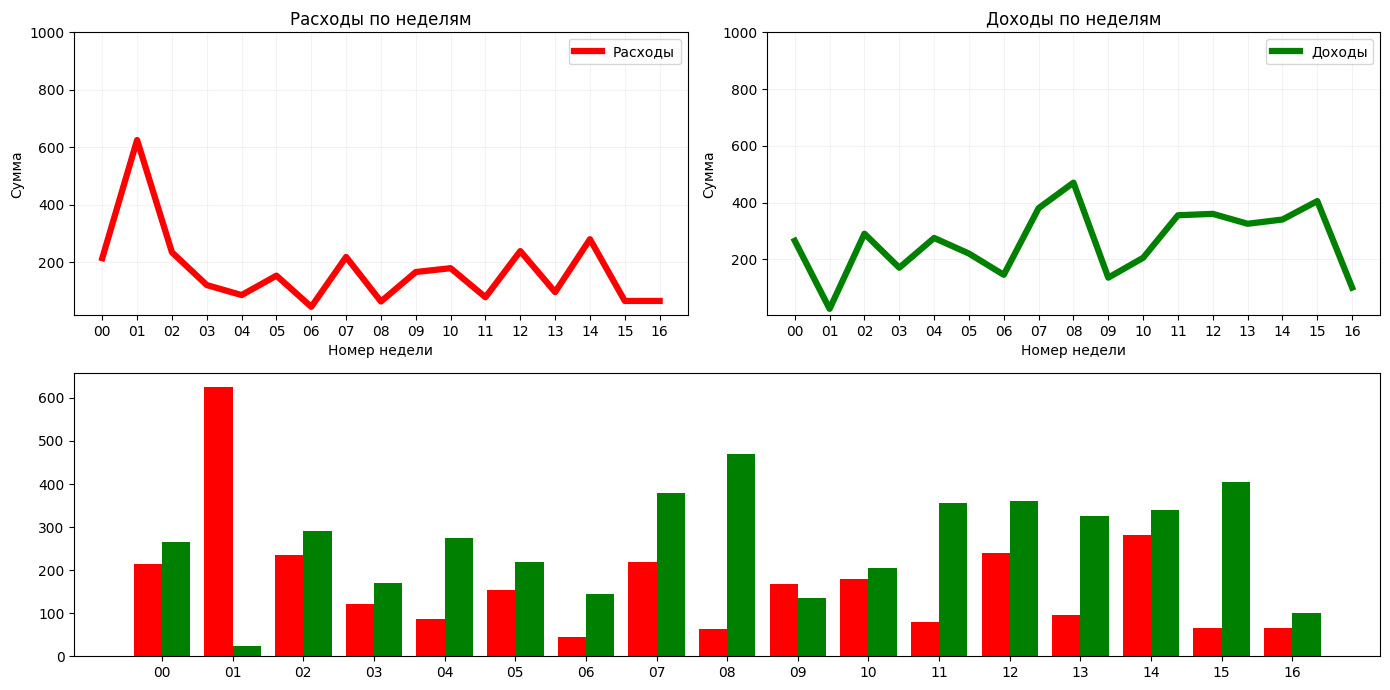

In [7]:
# 3 оконных графика
conn = sqlite3.connect("wallet.db")
df_expenses = pd.read_sql_query(
    """SELECT 
    strftime("%W", E."Дата и время") Week_Num,
    ROUND(SUM(E."Сумма в валюте счета"), 2) as Total_Expenses
FROM Expenses AS E
WHERE 
    E."Категория" NOT IN (
        "Купил (основная сумма)",
        "Дал в долг",
        "Другое"
    )
GROUP BY Week_Num
ORDER BY Week_Num """
    ,conn
)

df_income = pd.read_sql_query(
    """SELECT 
    strftime("%W", I."Дата и время") Week_Num,
    ROUND(SUM(I."Сумма в валюте счета"), 2) as Total_Income
FROM Income AS I
WHERE 
    I."Категория" IN (
        "Работа",
        "Прибыль с продажи"
    )
GROUP BY Week_Num
ORDER BY Week_Num """
    ,conn
)
conn.close()
fig, axs = plt.subplot_mosaic(
    [['A', 'B'], ['right', 'right']],
    figsize=(14, 7),
    layout='constrained'
)

# Построение линейного графика расходов по неделям на подграфике 'A'
axs['A'].plot(df_expenses['Week_Num'], df_expenses['Total_Expenses'], label='Расходы', color='red', linewidth = 4.5)
axs['A'].set_title('Расходы по неделям')
axs['A'].set_xlabel('Номер недели')
axs['A'].set_ylabel('Сумма')
axs['A'].set_ylim(top=1000)
axs['A'].grid(True, alpha = 0.15)
axs['A'].legend()

# Построение линейного графика доходов по неделям на подграфике 'B'
axs['B'].plot(df_income['Week_Num'], df_income['Total_Income'], label='Доходы', color='green', linewidth = 4.5)
axs['B'].set_title('Доходы по неделям')
axs['B'].set_xlabel('Номер недели')
axs['B'].set_ylabel('Сумма')
axs['B'].set_ylim(top=1000)
axs['B'].grid(True, alpha = 0.15)
axs['B'].legend()

# Построение столбчатой диаграммы сравнения доходов и расходов на подграфике 'right'
width = 0.4  # Ширина столбцов
df_merged = pd.merge(df_expenses, df_income, on='Week_Num', how='outer').fillna(0)
df_merged = df_merged.sort_values('Week_Num')

x = range(len(df_merged))
axs['right'].bar(x, df_merged['Total_Expenses'], width=width, label='Расходы', color='red')
axs['right'].bar([p + width for p in x], df_merged['Total_Income'], width, label='Доходы', color='green')
axs['right'].set_xticks([p + width/2 for p in x])
axs['right'].set_xticklabels(df_merged['Week_Num'])


plt.tight_layout()
plt.savefig("Доходность_по_неделям.png")


df.head()

## Ряд дианамики доходов по месяцам (2024 - 2025)

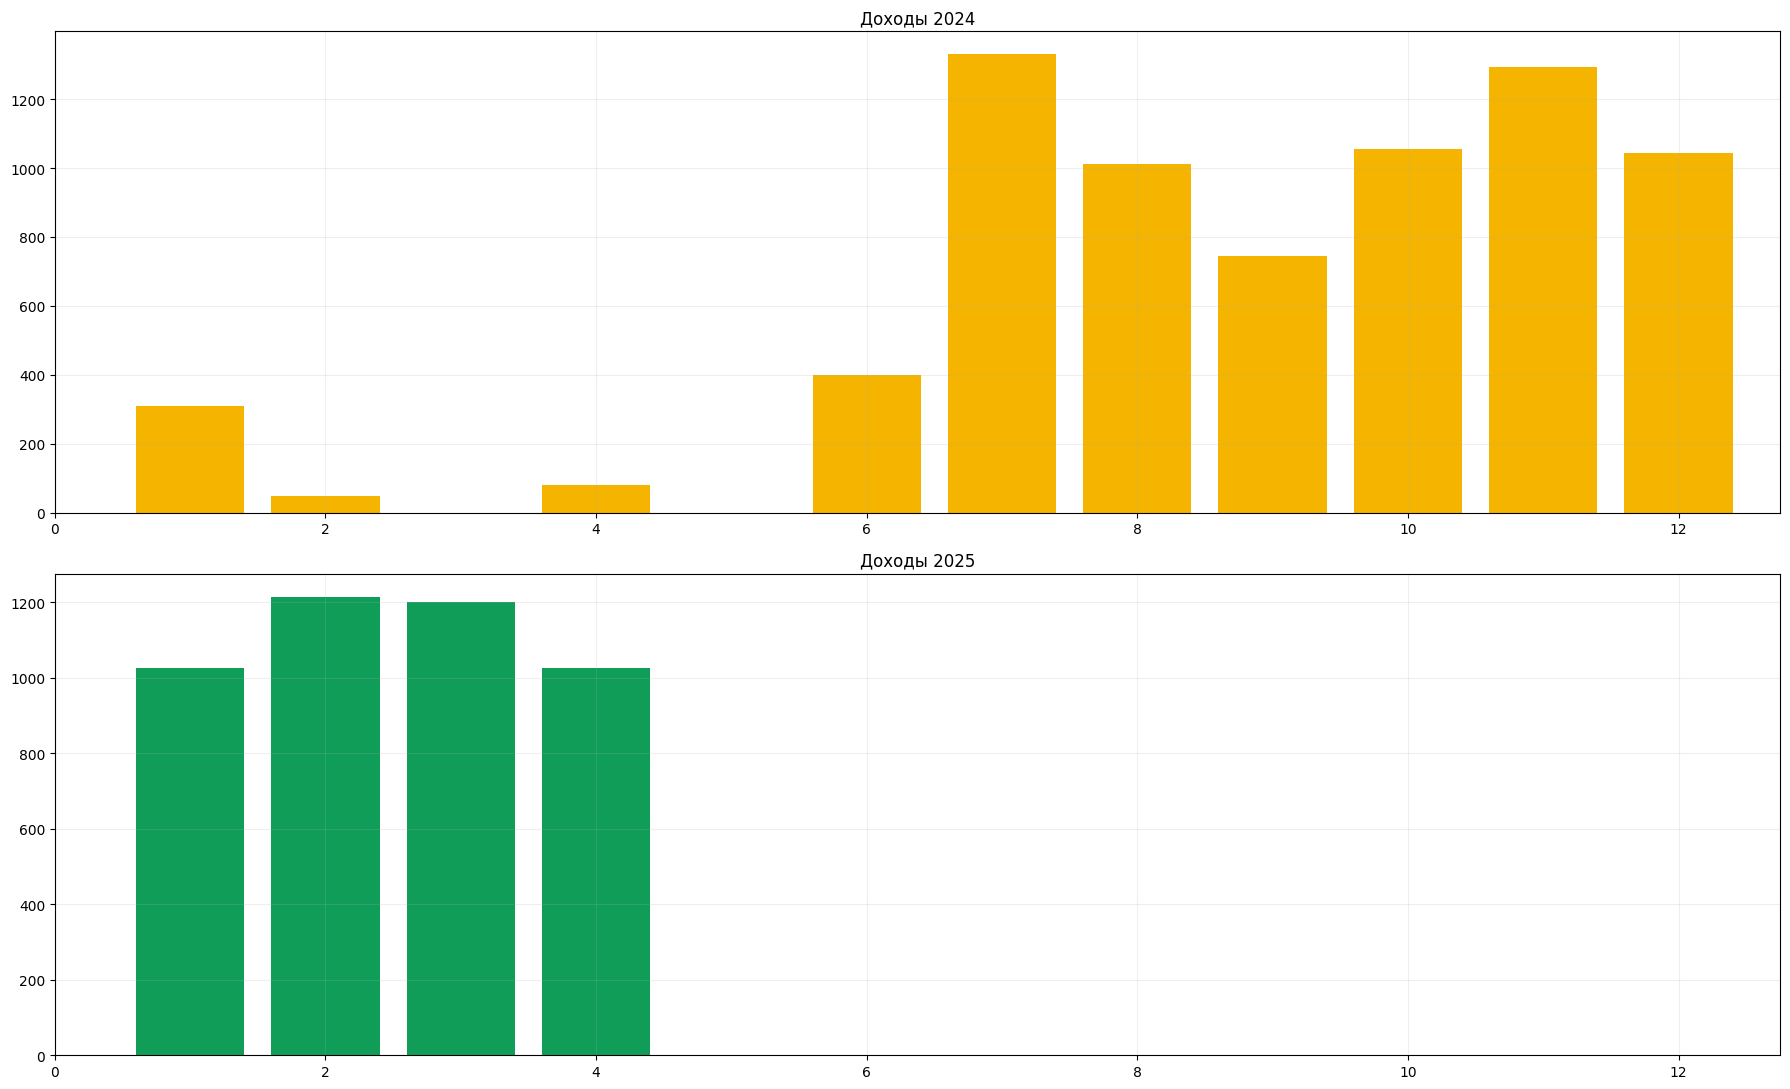

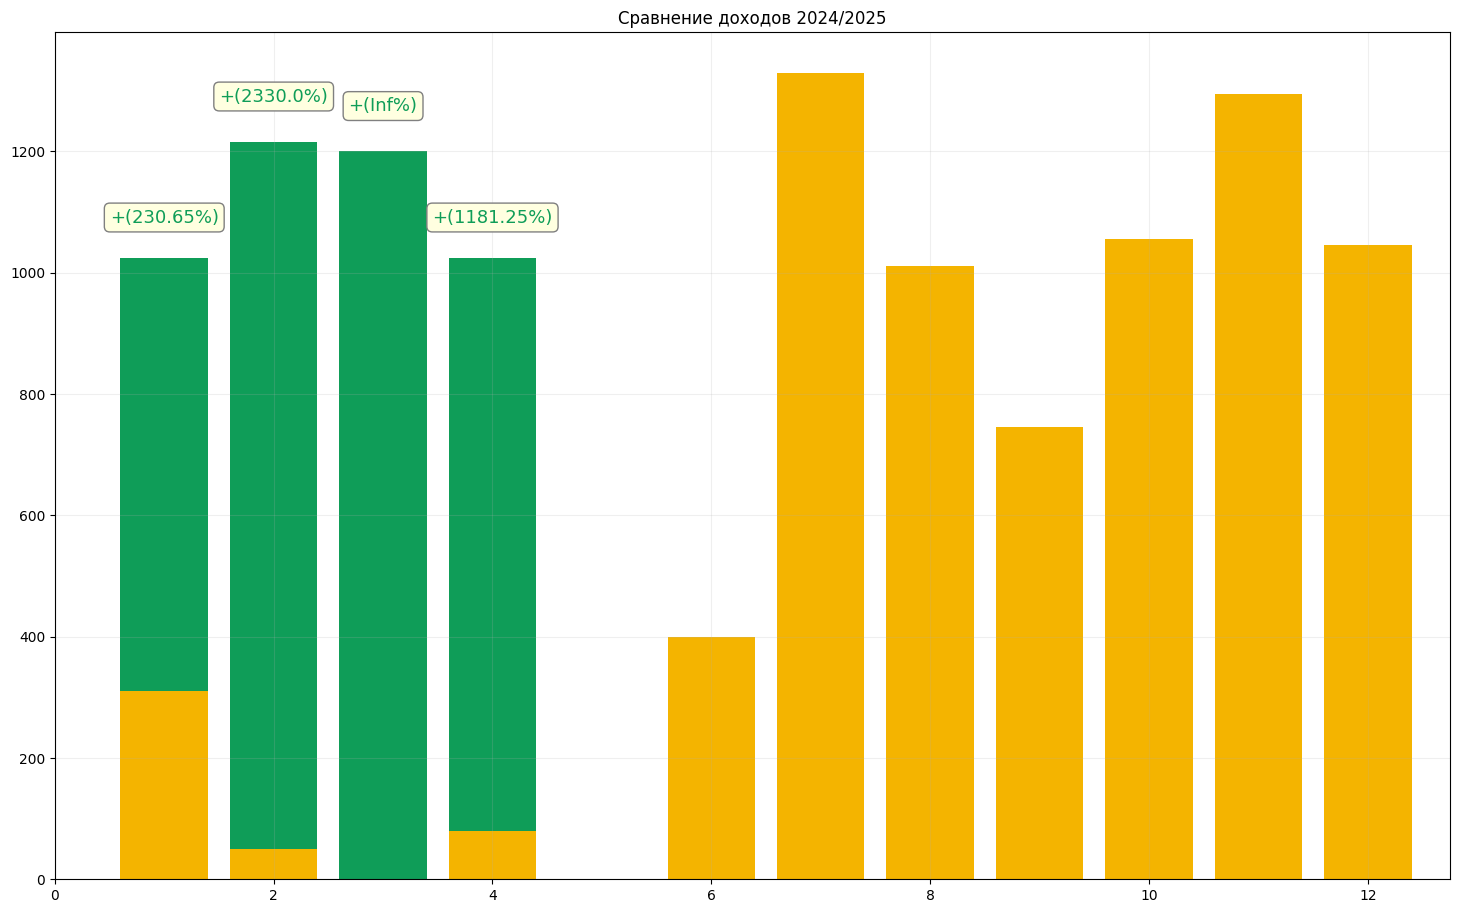

In [8]:

data = pd.read_csv('2024.csv', sep=';')
# Преобразование названий столбцов (если необходимо)
data.columns = data.columns.str.replace(' ', '_')
conn = sqlite3.connect('income_2024.db')
# Импорт данных в таблицу 'finance_data'
data.to_sql('finance_data', conn, if_exists='replace', index=False)
conn.close()

conn_2024 = sqlite3.connect("income_2024.db")
conn_2025 = sqlite3.connect("wallet.db")

df_2024 = pd.read_sql_query(
    """
    SELECT 
    Month AS "Месяц",
    Income AS "Сумма в валюте счета"
    FROM "2024"
    """,
    conn_2024
)
df_2025 = pd.read_sql_query(
    """
    SELECT 
    CAST(strftime('%m', "Дата и время") AS INTEGER) AS "Месяц",
    SUM("Сумма в валюте счета") AS "Сумма в валюте счета"
FROM 
    income
WHERE 
    Категория IN ('Прибыль с продажи', 'Работа')
GROUP BY 
    "Месяц"
ORDER BY 
    "Месяц";
    """,
    conn_2025
)

percent_of_growth = {}
i = 0
for current_period in df_2025["Сумма в валюте счета"]:
    result = 0
    past_period = df_2024["Сумма в валюте счета"][i]
    if past_period != 0 :
        result = round((current_period / past_period - 1) * 100, 2)
        percent_of_growth[i + 1] = result
    else: 
        result = "Inf"
        percent_of_growth[i + 1] = result
    i = i + 1

        
percent_of_growth
plt.figure(figsize=(18, 11))
plt.subplot(2, 1, 1)
plt.title("Доходы 2024")
plt.bar(df_2024["Месяц"], df_2024["Сумма в валюте счета"], color = Colors.GOOGLE_COLORS["Yellow"])
plt.xlim(0, 12.75)
plt.grid(True, alpha = 0.2)

plt.subplot(2, 1, 2)
plt.title("Доходы 2025")
plt.bar(df_2025["Месяц"], df_2025["Сумма в валюте счета"], color = Colors.GOOGLE_COLORS["Green"])
plt.xlim(0, 12.75)
plt.grid(True, alpha = 0.2)
# Сохранение графиков
plt.tight_layout()
plt.savefig("Доходы_2025_2025.png")
plt.show()

plt.figure(figsize=(18, 11))
plt.title("Сравнение доходов 2024/2025")

for month in percent_of_growth:
    growth = percent_of_growth[month]
    if growth is not None:
        # Получаем высоту колонки для 2025 года
        bar_height_2025 = df_2025.loc[df_2025["Месяц"] == month, "Сумма в валюте счета"].values[0]
        plt.text(month, bar_height_2025 + 0.05 * bar_height_2025,
                 f'+({growth}%)', ha='center', va='bottom', fontsize=13, color= Colors.GOOGLE_COLORS["Green"],
                 bbox=dict(
        facecolor='lightyellow',   # цвет заливки
        edgecolor='gray',          # цвет рамки
        boxstyle='round,pad=0.3',  # стиль рамки
        linewidth=1                # толщина линии
    ))

plt.bar(df_2025["Месяц"], df_2025["Сумма в валюте счета"], color = Colors.GOOGLE_COLORS["Green"])
plt.bar(df_2024["Месяц"], df_2024["Сумма в валюте счета"], color = Colors.GOOGLE_COLORS["Yellow"])
plt.xlim(0, 12.75)
plt.grid(True, alpha = 0.2)
plt.savefig("Сравнение_доходов_24_25.png")
plt.show()


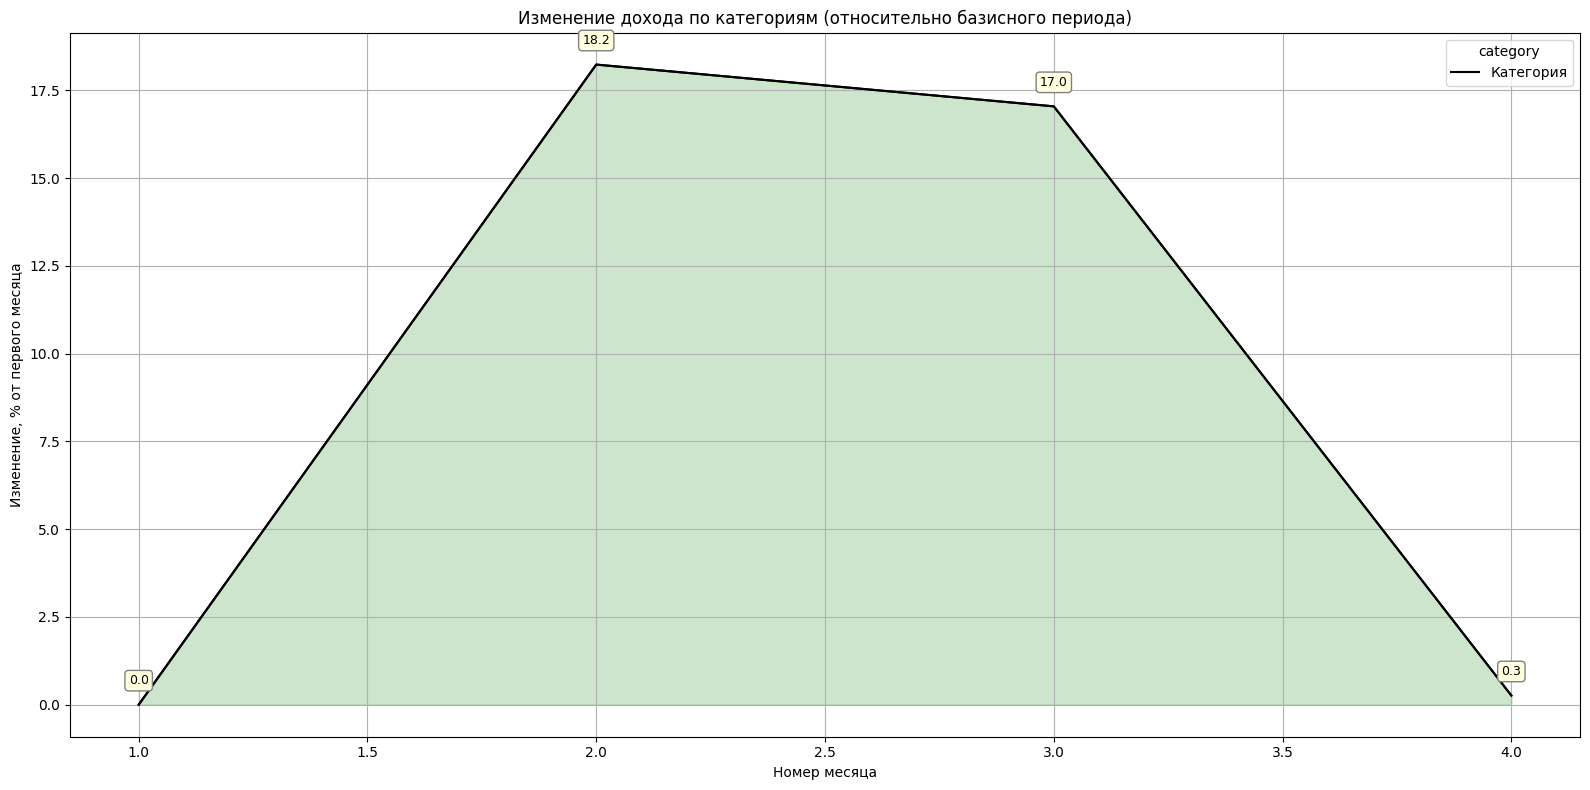

In [9]:
conn = sqlite3.connect("wallet.db")
df = pd.read_sql_query(
    """
    SELECT 
        Month_num AS Month,
        "Категория" AS category,
        total,
        (total / first_value(total) OVER (PARTITION BY category ORDER BY CAST(strftime('%W', "Дата и время") AS INTEGER)) - 1) * 100 AS pct_from_index
    FROM (
        SELECT 
             CAST(strftime('%m', "Дата и время") AS INTEGER) AS "Month_num",
            "Категория" AS category,
            SUM(CAST(REPLACE("Сумма в валюте счета", ',', '.') AS REAL)) AS total
        FROM Income 
        WHERE "Категория" IN ("Прибыль с продажи", "Работа")
        GROUP BY 1, 2
    ) AS a;
    """,
    conn
)

conn.close()

pivot_df = df.pivot_table(index="Month", columns="category", values="pct_from_index").fillna(0)

# Построение графика
ax = pivot_df.plot(kind = "line", figsize=(16,8), color = "Black", grid=(False))
pivot_df_text = pivot_df.reset_index()

for category in pivot_df.columns:
    y = pivot_df[category]
    x = pivot_df.index

    # Линия
    ax.plot(x, y, label=category, color='black')

    # Заливка зелёным выше 0
    ax.fill_between(x, y, 0, where=(y > 0), interpolate=True, color='green', alpha=0.2)

    # Заливка красным ниже 0
    ax.fill_between(x, y, 0, where=(y < 0), interpolate=True, color='red', alpha=0.2)

    # Подписи значений
    for x_i, y_i in zip(x, y):
        ax.text(x_i, y_i + 0.5, f"{y_i:.1f}", fontsize=9, ha='center', va='bottom',
                bbox=dict(facecolor='lightyellow', edgecolor='gray', boxstyle='round,pad=0.3', linewidth=1))


plt.title("Изменение дохода по категориям (относительно базисного периода)")
plt.xlabel("Номер месяца")
plt.ylabel("Изменение, % от первого месяца")
plt.grid(True)
plt.tight_layout()
plt.savefig("Изменение_дохода_по_категориям.png")
plt.show()


<Axes: >

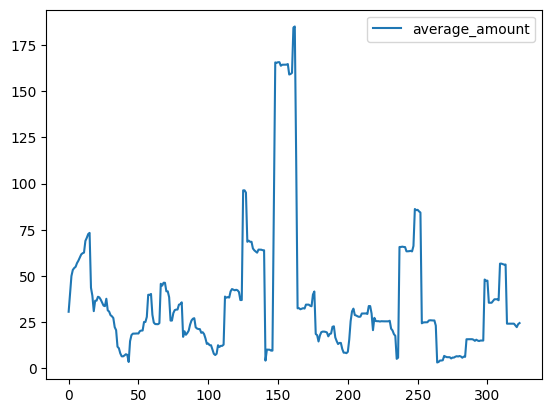

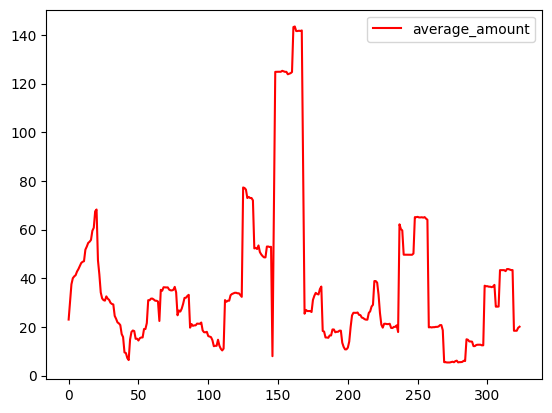

In [10]:
conn = sqlite3.connect("wallet.db")

df = pd.read_sql_query(
    """
    SELECT 
    date(DISTINCT "Дата и время"),
    SUM("Сумма в валюте счета") OVER w AS amount,
    ROUND(SUM("Сумма в валюте счета") OVER w / 15.0, 2) AS average_amount
    FROM Expenses
    WINDOW w AS (
    ORDER BY "Дата и время"
    ROWS BETWEEN 15 PRECEDING AND CURRENT ROW
);
""",
conn
)

df_2 = pd.read_sql_query(
    """
    SELECT 
    date(DISTINCT "Дата и время"),
    SUM("Сумма в валюте счета") OVER w AS amount,
    ROUND(SUM("Сумма в валюте счета") OVER w / 20.0, 2) AS average_amount
    FROM Expenses
    WINDOW w AS (
    ORDER BY "Дата и время"
    ROWS BETWEEN 20 PRECEDING AND CURRENT ROW
);
""",
conn
)
conn.close()

df.plot(kind = "line", y = "average_amount")
df_2.plot(kind = "line", y = "average_amount", color = 'red')

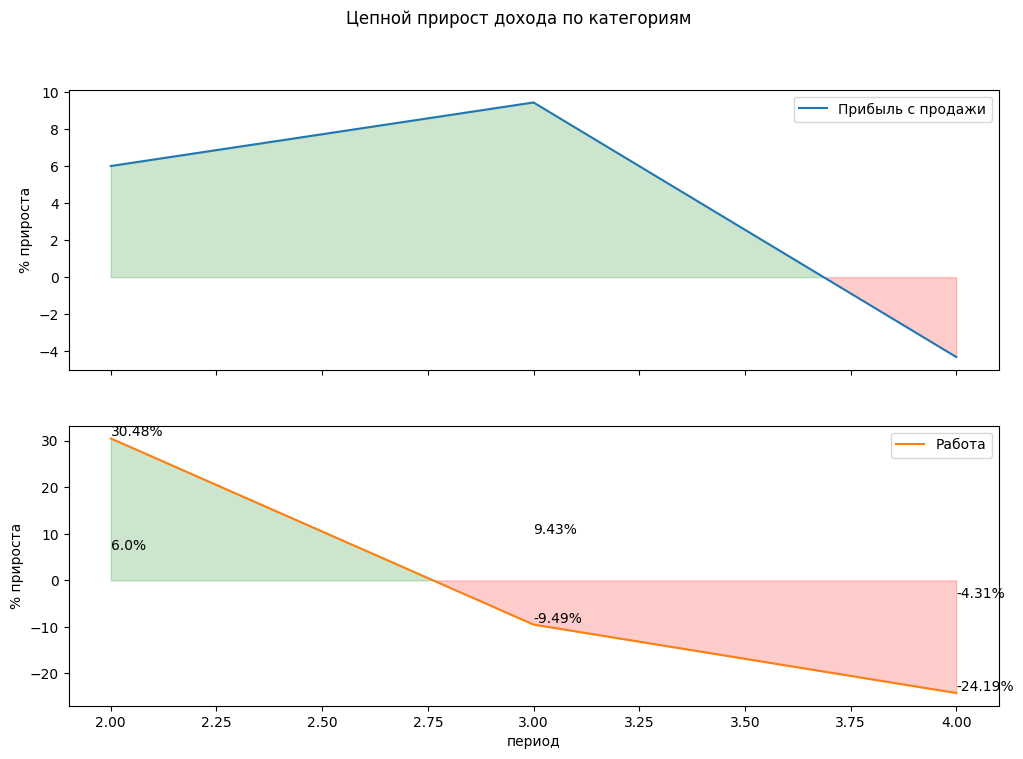

In [ ]:
conn = sqlite3.connect("wallet.db")
df = pd.read_sql_query(
    """
    WITH monthly_totals AS (
    SELECT 
        CAST(strftime('%m', "Дата и время") AS INTEGER) AS month_num,
        "Категория" AS category,
        SUM(CAST(REPLACE("Сумма в валюте счета", ',', '.') AS REAL)) AS total
    FROM Income 
    WHERE "Категория" IN ("Прибыль с продажи", "Работа")
    GROUP BY month_num, category
),
with_previous AS (
    SELECT 
        month_num AS month,
        category,
        total,
        LAG(total) OVER (PARTITION BY category ORDER BY month_num) AS prev_total
    FROM monthly_totals
)
SELECT 
    month,
    category,
    total,
    CASE 
        WHEN prev_total IS NULL THEN NULL  -- для первого месяца нет предыдущего значения
        WHEN prev_total = 0 THEN NULL     -- избегаем деления на ноль
        ELSE ROUND((total - prev_total) / prev_total * 100, 2)
    END AS chain_growth_rate_percent
FROM with_previous
ORDER BY category, month;
    """,
    conn
)
conn.close()
df_profit_chain = df[df.category == "Прибыль с продажи"]
df_profit_chain
df_salary_chain = df[df.category == "Работа"]
df_salary_chain

pivot_table = df.pivot_table(index = "month", columns = "category", values= "chain_growth_rate_percent")
x = pivot_table.index
y_profit = pivot_table["Прибыль с продажи"]
y_salary = pivot_table["Работа"]

ax = pivot_table.plot(
    kind = "line", 
    subplots=True, 
    figsize=(12,8), 
    title="Цепной прирост дохода по категориям", 
    ylabel="% прироста", 
    xlabel="период",

    )

for x_i, y_i in zip(x, y_profit):
        ax[0].text(x = x_i, y = y_i + 0.5, s = f"{y_i}%")
ax[0].fill_between(x, y_profit, 0, where=(y_profit > 0), interpolate=True, color='green', alpha=0.2)
ax[0].fill_between(x, y_profit, 0, where=(y_profit < 0), interpolate=True, color='red', alpha=0.2)
plt.ylabel("% прироста")

for x_i, y_i in zip(x, y_salary):
        ax[1].text(x = x_i, y = y_i + 0.5, s = f"{y_i}%")
ax[1].fill_between(x, y_salary, 0, where=(y_salary > 0), interpolate=True, color='green', alpha=0.2)
ax[1].fill_between(x, y_salary, 0, where=(y_salary < 0), interpolate=True, color='red', alpha=0.2)



In [21]:
pivot_table.reset_index()
pivot_table.index.tolist()

[2, 3, 4]

In [ ]:
# pivot_table.reset_index()
# for month in pivot_table.indexs:
#     growth = percent_of_growth[month]
#     if growth is not None:
#         # Получаем высоту колонки для 2025 года
#         bar_height_2025 = df_2025.loc[df_2025["Месяц"] == month, "Сумма в валюте счета"].values[0]
#         plt.text(month, bar_height_2025 + 0.05 * bar_height_2025,
#                  f'+({growth}%)', ha='center', va='bottom', fontsize=13, color= Colors.GOOGLE_COLORS["Green"],
#                  bbox=dict(
#         facecolor='lightyellow',   # цвет заливки
#         edgecolor='gray',          # цвет рамки
#         boxstyle='round,pad=0.3',  # стиль рамки
#         linewidth=1                # толщина линии
#     ))

# pivot_table
# x
# y_profit 
# y_salary 